## Day 12: Digital Plumber

http://adventofcode.com/2017/day/12

### Part 1

I'm cheating a bit here but I've wanted to look at networkx for a while.

In [1]:
import networkx as nx

Create a networkx Graph from the test data.

In [2]:
test_data = '''0 <-> 2
1 <-> 1
2 <-> 0, 3, 4
3 <-> 2, 4
4 <-> 2, 3, 6
5 <-> 6
6 <-> 4, 5'''

def process_data(data):
    pipes = nx.Graph()
    
    for line in data.splitlines():
        program, connections = line.strip().split(' <-> ')
        for c in connections.split(', '):
            pipes.add_edge(int(program), int(c))
        
    return pipes

test_pipes = process_data(test_data)

Have a quick look to make sure it's as it should be.

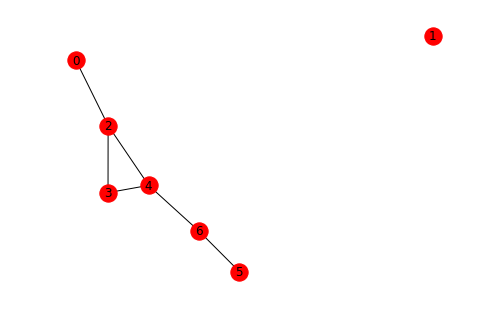

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(test_pipes, with_labels=True)

Depth first search from node 0 to find all connected nodes.

In [4]:
list(nx.dfs_preorder_nodes(test_pipes, 0))

[0, 2, 3, 4, 6, 5]

Now try with the problem data.

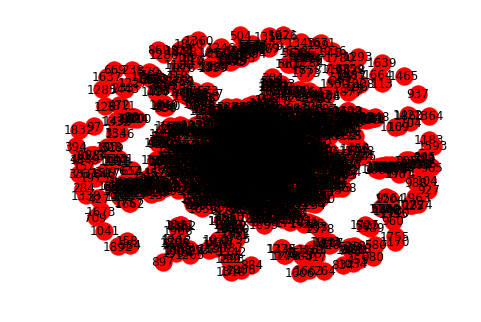

In [5]:
with open('input', 'r') as f:
    input_pipes = process_data(f.read())

nx.draw(input_pipes, with_labels=True)

That's not very useful. Anyway, count the number of nodes connected to 0 for the answer to Part 1.

In [6]:
len(list(nx.dfs_preorder_nodes(input_pipes, 0)))

283

### Part 2

The answer to Part 2 is the number of connected groups.

In [7]:
len(list(nx.connected_components(input_pipes)))

195

That does feel like cheating, I must admit.